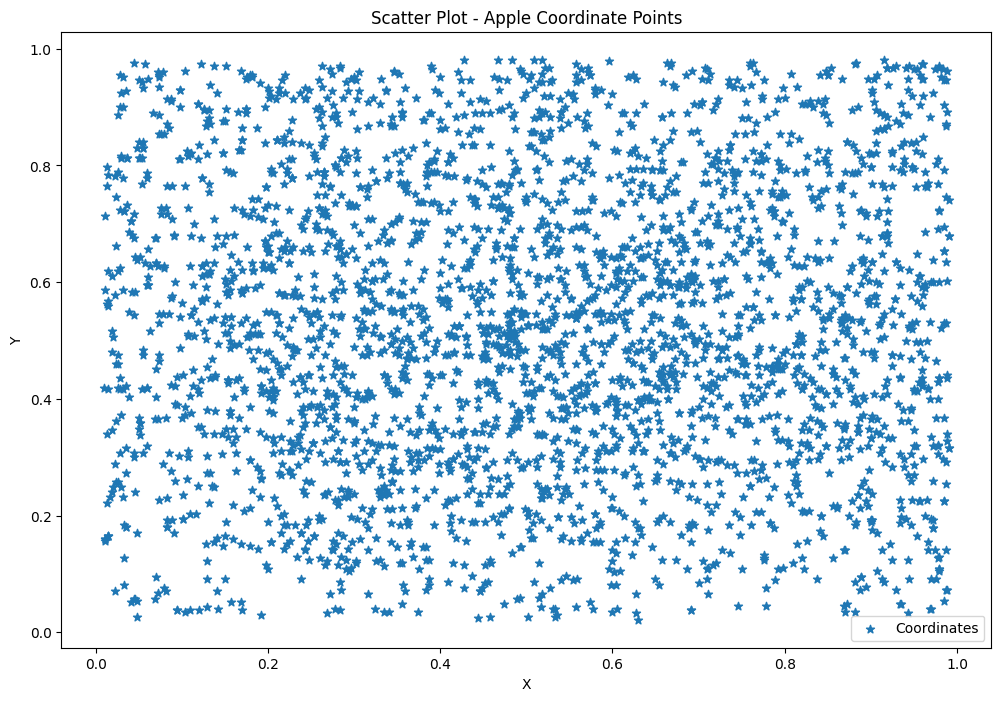

In [12]:
import os
import matplotlib.pyplot as plt

def flip_y(y):
    return 1 - y

def extract_coordinates_from_file(file_path):
    x_values = []
    y_values = []

    try:
        with open(file_path, 'r') as file:
            for line in file:
                # 将每一行按空格分割，并提取第二和第三个数字
                values = line.strip().split()
                if len(values) >= 3:
                    x = float(values[1])
                    y = float(values[2])
                    y = flip_y(y)  # 对y值进行翻转
                    x_values.append(x)
                    y_values.append(y)
    except Exception as e:
        print(f"无法读取文件 {file_path}: {e}")

    return x_values, y_values

def plot_scatter(directory):
    x_all = []
    y_all = []

    # 获取目录中所有文件
    files = [f for f in os.listdir(directory) if f.endswith('.txt')]

    # 遍历每个文件并提取坐标
    for file_name in files:
        file_path = os.path.join(directory, file_name)
        x_values, y_values = extract_coordinates_from_file(file_path)
        x_all.extend(x_values)
        y_all.extend(y_values)

    # 绘制散点图
    plt.figure(figsize=(12,8))
    plt.scatter(x_all, y_all, marker='*', label='Coordinates')
    plt.title('Scatter Plot - Apple Coordinate Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.savefig('Question2.png',dpi=1200)
    plt.show()

if __name__ == "__main__":
    # 指定目录路径
    target_directory = './yolov5-master/runs/detect/exp2/labels/'

    # 调用函数绘制散点图
    plot_scatter(target_directory)
